---

------

# 🚧 📧 **PROJET CONVERSION RATE** ✅ ❌

##### **Doriane DOYON-DOUSSE** : *Certification bloc 3* ✅  (**ds_fs_od_03** 📖) 

------

### ➡️ **Importation librairies** 📚

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import ensemble methods
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" 
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

### ➡️ **Lecture of the dataset** 📀

In [2]:
print('Lecture of the dataset ...')
conversion = pd.read_csv('conversion_data_train.csv')
print('...Done!')

Lecture of the dataset ...
...Done!


-----

## 🔷 **PART 1️⃣ :** EDA / Preprocessings / **Train baseline model**

-----

### ➡️ **Baseline Model** : MODEL 1  🔎 🌺

#### <ins>Jedha Baseline Model</ins> 	🌺

- This baseline model has been included by Jedha as a **basic template**. 
- A single explanatory variable is used : the **total number of pages visited** 
- Let's build our **Simple Logistic Regression model** as a baseline 

In [3]:
# Visualizing 5 rows from the dataset 

conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [4]:
print('-----------------------')
print('Separating X from Y ...')
print('-----------------------')
print()
features_list = ['total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

X = conversion.loc[:, features_list]
Y = conversion.loc[:, target_variable]

print('Explanatory variables : ', X.columns)

print()
print('-----------------------')
print('...Done')
print('-----------------------')

-----------------------
Separating X from Y ...
-----------------------

Explanatory variables :  Index(['total_pages_visited'], dtype='object')

-----------------------
...Done
-----------------------


In [5]:
print('--------------------------------')
print('     Train Test Split ...')
print('--------------------------------')
print()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)


print()
print('--------------------------------')
print('             ...Done')
print('--------------------------------')

--------------------------------
     Train Test Split ...
--------------------------------


--------------------------------
             ...Done
--------------------------------


In [6]:
print('--------------------------------')
print('       Preprocessing ...')
print('--------------------------------')
print()
print()

print('Preprocessing on X_train : ')
print()
featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

print()
print()

print('Preprocessing on X_test : ')
print()
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

print()
print()
print('--------------------------------')
print('             ...Done')
print('--------------------------------')

--------------------------------
       Preprocessing ...
--------------------------------


Preprocessing on X_train : 

...Done
[[-0.26070136]
 [ 0.93728655]
 [-0.85969532]
 [-0.56019834]
 [-0.26070136]]


Preprocessing on X_test : 

...Done
[[ 0.63778957]
 [ 0.03879562]
 [-0.26070136]
 [-0.26070136]
 [ 0.63778957]]


--------------------------------
             ...Done
--------------------------------


In [7]:
print('--------------------------------')
print('       Training the Model ...')
print('--------------------------------')
print()

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)


print()
print('--------------------------------')
print('             ...Done')
print('--------------------------------')

--------------------------------
       Training the Model ...
--------------------------------


--------------------------------
             ...Done
--------------------------------


In [8]:
print('--------------------------------')
print('       Predictions ...')
print('--------------------------------')
print()
print()

print("Predictions on training set :")
print()
Y_train_pred = classifier.predict(X_train)
print(Y_train_pred)

print()
print()

print("Predictions on test set : ")
print()
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)

print()
print()
print('--------------------------------')
print('             ...Done')
print('--------------------------------')

--------------------------------
       Predictions ...
--------------------------------


Predictions on training set :

[0 0 0 ... 0 0 0]


Predictions on test set : 

...Done.
[0 0 0 ... 0 0 0]


--------------------------------
             ...Done
--------------------------------


In [9]:
print('--------------------------------')
print('       Performances ...')
print('--------------------------------')
print()
print()

model_1_train_f1score = f1_score(Y_train, Y_train_pred)
model_1_test_f1score = f1_score(Y_test, Y_test_pred)

print("F1-score on train set : ", model_1_train_f1score)
print()
print("F1-score on test set : ", model_1_test_f1score)


print()
print()
print('--------------------------------')
print('             ...Done')
print('--------------------------------')

--------------------------------
       Performances ...
--------------------------------


F1-score on train set :  0.6938517686692869

F1-score on test set :  0.7060240963855423


--------------------------------
             ...Done
--------------------------------


In [10]:
print('--------------------------------')
print('       Confusion Matrix ...')
print('--------------------------------')
print()
print()

print("Confusion matrix on train set : ")
print()
print(confusion_matrix(Y_train, Y_train_pred))

print()
print()
print('+++++++++++++++++++++++++++++++ ')
print()
print()

print("Confusion matrix on test set : ")
print()
print(confusion_matrix(Y_test, Y_test_pred))
print()

print()
print()
print('--------------------------------')
print('             ...Done')
print('--------------------------------')

--------------------------------
       Confusion Matrix ...
--------------------------------


Confusion matrix on train set : 

[[246817   1082]
 [  3280   4943]]


+++++++++++++++++++++++++++++++ 


Confusion matrix on test set : 

[[27384   117]
 [  371   586]]



--------------------------------
             ...Done
--------------------------------


---------------------------------------------------------
             Visualizing Confusion Matrix ...
---------------------------------------------------------


Confusion matrix on train set : 



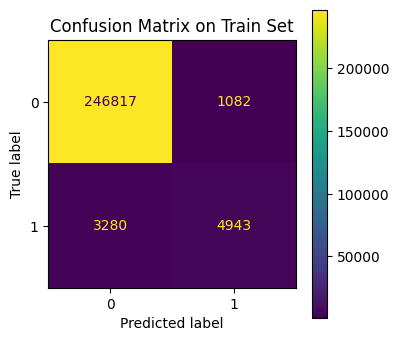



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Confusion matrix on test set : 



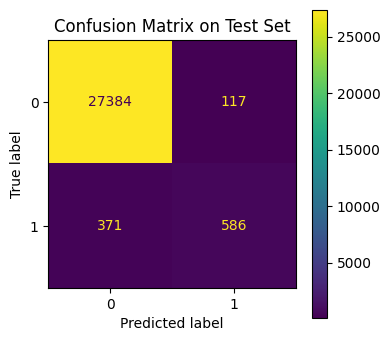



---------------------------------------------------------
                         ...Done
---------------------------------------------------------


In [11]:
print('---------------------------------------------------------')
print('             Visualizing Confusion Matrix ...')
print('---------------------------------------------------------')
print()
print()


print("Confusion matrix on train set : ")
print()

_, ax = plt.subplots(figsize=(4,4))
ax.set(title="Confusion Matrix on Train Set")
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax)
plt.show()

print()
print()
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print()
print()

print("Confusion matrix on test set : ")
print()

_, ax = plt.subplots(figsize=(4,4))
ax.set(title="Confusion Matrix on Test Set")
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.show()


print()
print()
print('---------------------------------------------------------')
print('                         ...Done')
print('---------------------------------------------------------')

---------------------------------------------------------
             Visualizing ROC Curves ...
---------------------------------------------------------


ROC Curve on train set : 



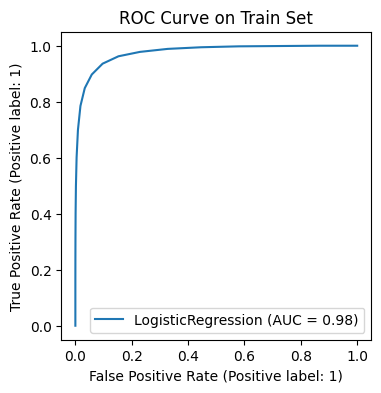



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ROC Curve on test set : 



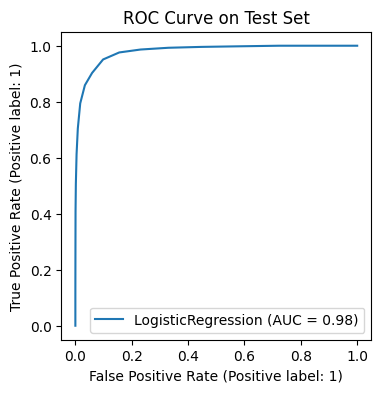



---------------------------------------------------------
                         ...Done
---------------------------------------------------------


In [12]:
print('---------------------------------------------------------')
print('             Visualizing ROC Curves ...')
print('---------------------------------------------------------')
print()
print()


print("ROC Curve on train set : ")
print()

_, ax = plt.subplots(figsize=(4,4))
ax.set(title="ROC Curve on Train Set")
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax)
plt.show()

print()
print()
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print()
print()

print("ROC Curve on test set : ")
print()

_, ax = plt.subplots(figsize=(4,4))
ax.set(title="ROC Curve on Test Set")
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.show()


print()
print()
print('---------------------------------------------------------')
print('                         ...Done')
print('---------------------------------------------------------')

-----

## 🔷 **PART 2️⃣ :** **Improving F1 Score** of the Model

-----

- Our basline model is not bad but **could be way more better in term of performances**. 
- We have seen before thanks to the EDA done in part 1 that the **total number of pages visited is the most correlated to the target variable**. 
- Let's retry our Logitic Regression model but this time **with all variables, setting some parameters** and test if it is better or not 
- Then we will **test several other models**, for some of them not linear, and **put them in a dataframe in order to regroup performances**.


- As mentioned in the project, **the only metric we will focus on is the F1 SCORE** (the Accuracy is not really a good metric in that case as the target is imbalanced), it is a metric that combine precision and recall :)


### **A. Logitic Regression with ALL Explanatory variables included** 🌷

### <ins>MODEL 2</ins> 🌷

In [13]:
print('---------------------------------------------------------')
print('             Separation of Features from Label ')
print('---------------------------------------------------------')
print()
print()

target_variable = 'converted'

X2 = conversion.drop(target_variable, axis=1)
Y2 = conversion.loc[:, target_variable]

print('Here are our Explanatory variables :')
print()
print(X2.head())

print()
print()

print('Here is our Target variable:')
print()
print(Y2.head())

print()
print()
print('---------------------------------------------------------')
print('---------------------------------------------------------')

---------------------------------------------------------
             Separation of Features from Label 
---------------------------------------------------------


Here are our Explanatory variables :

   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3


Here is our Target variable:

0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64


---------------------------------------------------------
---------------------------------------------------------


In [14]:
print('---------------------------------------------------------')
print('            T R A I N    T E S T   S P L I T ')
print('---------------------------------------------------------')
print()
print()

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, 
                                                    test_size=0.2, 
                                                    random_state=23,
                                                    stratify=Y)

print('                     . . . Done.')
print()
print()
print('---------------------------------------------------------')
print('---------------------------------------------------------')

---------------------------------------------------------
            T R A I N    T E S T   S P L I T 
---------------------------------------------------------


                     . . . Done.


---------------------------------------------------------
---------------------------------------------------------


In [15]:
print('---------------------------------------------------------------------------')
print('               P I P E L I N E    I N    P R O G R E S S ')
print('---------------------------------------------------------------------------')
print()
print()

print('Numerical pipeline ...')
print()


numerical_features2 = ['age', 'total_pages_visited']
numerical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

print('...Done')

print()
print('---------------------------------------------------------------------------')
print()

print('Categorical pipeline ...')
print()

categorical_features2 = ['country', 'new_user', 'source']
categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

print('...Done')

print()
print('****************************************************************************')
print()

print('Creating preprocessor2 object in order to apply treatment from Pipelines...')
print()
preprocessor2 = ColumnTransformer(transformers=[
    ('num', numerical_transformer2, numerical_features2),
    ('cat', categorical_transformer2, categorical_features2)
])
print('...Done')


print()
print()
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')



---------------------------------------------------------------------------
               P I P E L I N E    I N    P R O G R E S S 
---------------------------------------------------------------------------


Numerical pipeline ...

...Done

---------------------------------------------------------------------------

Categorical pipeline ...

...Done

****************************************************************************

Creating preprocessor2 object in order to apply treatment from Pipelines...

...Done


---------------------------------------------------------------------------
---------------------------------------------------------------------------


In [16]:
print('---------------------------------------------------------------------------')
print('                       P R E P R O C E S S I N G ')
print('---------------------------------------------------------------------------')
print()
print()

print("Performing preprocessings on train set...")
print()
print(X_train2.head())
X_train2 = preprocessor2.fit_transform(X_train2)
print('...Done.')
print()
print(X_train2[0:5]) 
print()

print()
print('****************************************************************************')
print()


print("Performing preprocessings on test set...")
print()
print(X_test2.head()) 
X_test2 = preprocessor2.transform(X_test2) 
print('...Done.')
print()
print(X_test2[0:5,:])
print()


print()
print()
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
                       P R E P R O C E S S I N G 
---------------------------------------------------------------------------


Performing preprocessings on train set...

       country  age  new_user source  total_pages_visited
234907      UK   26         1    Seo                    6
80834    China   36         0    Ads                    5
71821    China   23         1    Seo                    4
258959   China   24         1    Seo                    3
185793      UK   26         1    Seo                    2
...Done.

[[-0.55318482  0.33770426  0.          1.          0.          1.
   0.          1.        ]
 [ 0.65637087  0.03832223  0.          0.          0.          0.
   0.          0.        ]
 [-0.91605152 -0.26105981  0.          0.          0.          1.
   0.          1.        ]
 [-0.79509596 -0.56044184  0.          0.          0.          1.
   0.          1.        ]
 [-0.55318482 -0.859823

In [17]:
print('---------------------------------------------------------------------------')
print('                       T R A N I N G    M O D E L')
print('---------------------------------------------------------------------------')
print()
print()

print("                             Train model...")
print()
classifier2 = LogisticRegression()
classifier2.fit(X_train2, Y_train2)
print("                                 ...Done.")

print()
print()
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')



---------------------------------------------------------------------------
                       T R A N I N G    M O D E L
---------------------------------------------------------------------------


                             Train model...

                                 ...Done.


---------------------------------------------------------------------------
---------------------------------------------------------------------------


In [18]:
print('---------------------------------------------------------------------------')
print('                       P R E D I C T I O N S')
print('---------------------------------------------------------------------------')
print()
print()

print('Predictions on the train set...')
print()
Y_train_pred2 = classifier2.predict(X_train2)
print(Y_train_pred2)
print('...Done')

print()
print('****************************************************************************')
print()

print("Predictions on test set...")
print()
Y_test_pred2 = classifier2.predict(X_test2)
print("...Done.")
print(Y_test_pred2)


print()
print()
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
                       P R E D I C T I O N S
---------------------------------------------------------------------------


Predictions on the train set...

[0 0 0 ... 0 0 0]
...Done

****************************************************************************

Predictions on test set...

...Done.
[0 0 1 ... 0 0 0]


---------------------------------------------------------------------------
---------------------------------------------------------------------------


In [19]:
print('---------------------------------------------------------------------------')
print('                       P E R F O R M A N C E S')
print('---------------------------------------------------------------------------')
print()
print()

model_2_train_f1score = f1_score(Y_train2, Y_train_pred2)
model_2_test_f1score = f1_score(Y_test2, Y_test_pred2)

print('Performances on the train set : ', model_2_train_f1score)

print()
print('****************************************************************************')
print()

print('Performances on the test set : ', model_2_test_f1score)


print()
print()
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
                       P E R F O R M A N C E S
---------------------------------------------------------------------------


Performances on the train set :  0.7650207312476442

****************************************************************************

Performances on the test set :  0.7563791008505467


---------------------------------------------------------------------------
---------------------------------------------------------------------------


---------------------------------------------------------
        MODEL 2 : C O N F U S I O N   M A T R I X 
---------------------------------------------------------


MODEL 2 -- Confusion matrix on train set : 



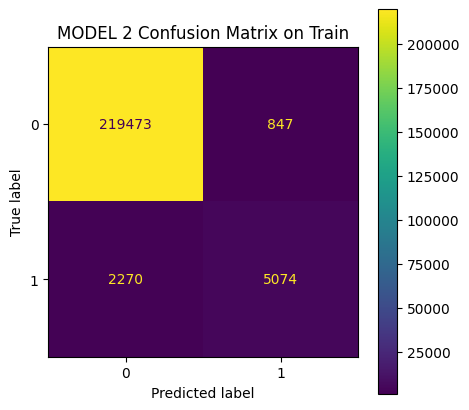



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


MODEL 2 -- Confusion matrix on test set: 



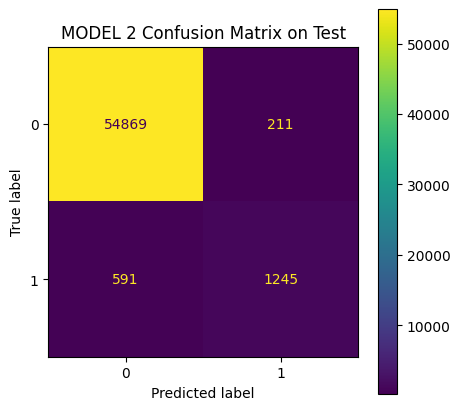



---------------------------------------------------------
---------------------------------------------------------


In [20]:
print('---------------------------------------------------------')
print('        MODEL 2 : C O N F U S I O N   M A T R I X ')
print('---------------------------------------------------------')
print()
print()


print("MODEL 2 -- Confusion matrix on train set : ")
print()

_, ax = plt.subplots(figsize=(5,5))
ax.set(title="MODEL 2 Confusion Matrix on Train")
ConfusionMatrixDisplay.from_estimator(classifier2, X_train2, Y_train2, ax=ax)
plt.show()

print()
print()
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print()
print()

print("MODEL 2 -- Confusion matrix on test set: ")
print()

_, ax = plt.subplots(figsize=(5,5))
ax.set(title="MODEL 2 Confusion Matrix on Test")
ConfusionMatrixDisplay.from_estimator(classifier2, X_test2, Y_test2, ax=ax)
plt.show()


print()
print()
print('---------------------------------------------------------')
print('---------------------------------------------------------')

---------------------------------------------------------
             MODEL 2 :  R O C   C U R V E S 
---------------------------------------------------------


MODEL 2 -- ROC Curve on train set : 



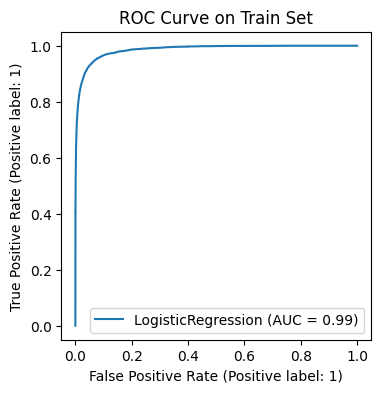



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


MODEL 2 -- ROC Curve on test set : 



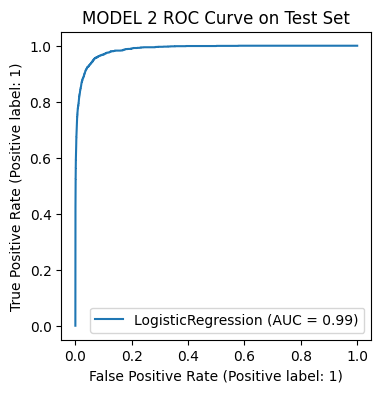



---------------------------------------------------------
                         ...Done
---------------------------------------------------------


In [21]:
print('---------------------------------------------------------')
print('             MODEL 2 :  R O C   C U R V E S ')
print('---------------------------------------------------------')
print()
print()


print("MODEL 2 -- ROC Curve on train set : ")
print()

_, ax = plt.subplots(figsize=(4,4))
ax.set(title="ROC Curve on Train Set")
RocCurveDisplay.from_estimator(classifier2, X_train2, Y_train2, ax=ax)
plt.show()

print()
print()
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print()
print()

print("MODEL 2 -- ROC Curve on test set : ")
print()

_, ax = plt.subplots(figsize=(4,4))
ax.set(title="MODEL 2 ROC Curve on Test Set")
RocCurveDisplay.from_estimator(classifier2, X_test2, Y_test2, ax=ax)
plt.show()


print()
print()
print('---------------------------------------------------------')
print('                         ...Done')
print('---------------------------------------------------------')

### **Interpretation :** 🔍
+ Okay so with our Second Model : **MODEL 2 we have better performances** : 

    - F1 Score on the **train** :  **0.7650**
    - F1 Score on the **test** : **0.7563**
    - Area under the Curve **(AUC) is higher**
    - **True Positive** and **True Negative** observations are **higher too** which means **we predict better than the baseline**
    - It means that even if the variable total number of visited pages is the most correlated, **taking into account all of the others variables is important** in order the raise our performances 
    -


+ But as Data Scientists we still haven't raise our goal, we need to try to  **optimize MODEL 2 by tuning hyperparameters**, and this is what we are going to try to do in the next cells of code  

In [22]:
print('---------------------------------------------------------------------------')
print('      T U N I N G   H Y P E R P A R A M S   //   G R I D  S E A R C H')
print('---------------------------------------------------------------------------')
print()
print()


log_reg_params = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

grid_search2 = GridSearchCV(classifier2, param_grid=log_reg_params , cv=5, n_jobs=-1)
grid_search2.fit(X_train2, Y_train2)



print('MODEL 2 TUNING -- Best hyperparameters : ', grid_search2.best_params_)
print()
print('MODEL 2 TUNING -- Best score : ', grid_search2.best_score_)

print()
print()
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
      T U N I N G   H Y P E R P A R A M S   //   G R I D  S E A R C H
---------------------------------------------------------------------------




MODEL 2 TUNING -- Best hyperparameters :  {'C': 11.288378916846883, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

MODEL 2 TUNING -- Best score :  0.9863702652016262


---------------------------------------------------------------------------
---------------------------------------------------------------------------


In [23]:
print('---------------------------------------------------------------------------')
print('      P R E D I C T I O N S    O N    M O D E L   2    T U N E D')
print('---------------------------------------------------------------------------')
print()
print()


print('Predictions on the train set...')
print()
Y_train_pred2_tuned = grid_search2.predict(X_train2)
print(Y_train_pred2_tuned)
print('...Done')

print()
print('****************************************************************************')
print()

print("Predictions on test set...")
print()
Y_test_pred2_tuned = grid_search2.predict(X_test2)
print("...Done.")
print(Y_test_pred2_tuned)


print()
print()
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
      P R E D I C T I O N S    O N    M O D E L   2    T U N E D
---------------------------------------------------------------------------


Predictions on the train set...

[0 0 0 ... 0 0 0]
...Done

****************************************************************************

Predictions on test set...

...Done.
[0 0 1 ... 0 0 0]


---------------------------------------------------------------------------
---------------------------------------------------------------------------


In [24]:
print('---------------------------------------------------------------------------')
print('                       P E R F O R M A N C E S')
print('---------------------------------------------------------------------------')
print()
print()

gs2_train_f1score = f1_score(Y_train2, Y_train_pred2_tuned)
gs2_test_f1score = f1_score(Y_test2, Y_test_pred2_tuned)

print('MODEL 2 TUNED ---- F1 SCORE on train set : ', gs2_train_f1score)
print()
print('MODEL 2 TUNED ---- F1 SCORE on test set : ', gs2_test_f1score)


print()
print()
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
                       P E R F O R M A N C E S
---------------------------------------------------------------------------


MODEL 2 TUNED ---- F1 SCORE on train set :  0.7651178552601853

MODEL 2 TUNED ---- F1 SCORE on test set :  0.7570518653321201


---------------------------------------------------------------------------
---------------------------------------------------------------------------


---------------------------------------------------------
        MODEL 2 TUNED : C O N F U S I O N   M A T R I X 
---------------------------------------------------------


MODEL 2 TUNED -- Confusion matrix on train set : 



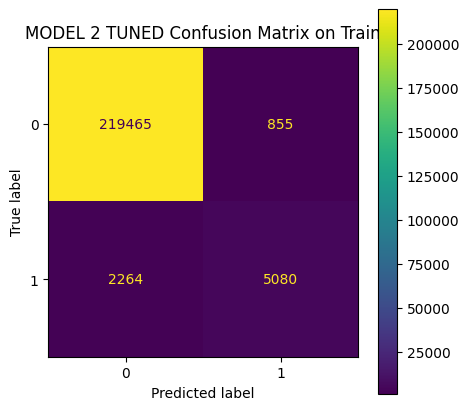



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


MODEL 2 TUNED -- Confusion matrix on test set: 



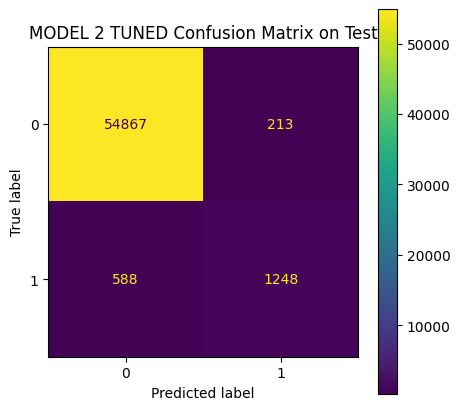



---------------------------------------------------------
---------------------------------------------------------


In [25]:
print('---------------------------------------------------------')
print('        MODEL 2 TUNED : C O N F U S I O N   M A T R I X ')
print('---------------------------------------------------------')
print()
print()


print("MODEL 2 TUNED -- Confusion matrix on train set : ")
print()

_, ax = plt.subplots(figsize=(5,5))
ax.set(title="MODEL 2 TUNED Confusion Matrix on Train")
ConfusionMatrixDisplay.from_estimator(grid_search2, X_train2, Y_train2, ax=ax)
plt.show()

print()
print()
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print()
print()

print("MODEL 2 TUNED -- Confusion matrix on test set: ")
print()

_, ax = plt.subplots(figsize=(5,5))
ax.set(title="MODEL 2 TUNED Confusion Matrix on Test")
ConfusionMatrixDisplay.from_estimator(grid_search2, X_test2, Y_test2, ax=ax)
plt.show()


print()
print()
print('---------------------------------------------------------')
print('---------------------------------------------------------')

In [26]:
print('---------------------------------------------------------------------------')
print('         MODEL 2 TUNED : C L A S S I F I C A T I O N   R E P O R T')
print('---------------------------------------------------------------------------')
print()
print()


from sklearn.metrics import classification_report

print(classification_report(Y_test2, Y_test_pred2_tuned))


print()
print()
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
         MODEL 2 TUNED : C L A S S I F I C A T I O N   R E P O R T
---------------------------------------------------------------------------


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55080
           1       0.85      0.68      0.76      1836

    accuracy                           0.99     56916
   macro avg       0.92      0.84      0.87     56916
weighted avg       0.99      0.99      0.99     56916



---------------------------------------------------------------------------
---------------------------------------------------------------------------


#### **Interpretation :** 🔍

+ Woah, performances seem really really good here on **MODEL 2 TUNED** : 

    - Score on the **train** :  **0.7651**
    - Score on the **test** : **0.7570**
    - The l2 penalty means we applied **Ridge (L2) regularization** on the model *grid_search2*
    - **Better performances than 2 first models**
    -


+ Still, we can't stop here, we have to try other type of models (**no free lunch theorem**)  

---

## 🔹 **Plot the models** 📊

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +

##### ℹ️ *Adding the result from the 3 precedent models into a dataframe* :  

In [27]:
scores = [] # list where all the model performances will be stored

In [28]:
# Adding 'Model 1 (baseline)' into the dataframe 
scores.append({'name_model': 'MODEL 1',
                'model': 'LogReg Baseline', 
                'F1_SCORE' : model_1_train_f1score,
                'set' : 'train'})

scores.append({'name_model': 'MODEL 1',
                'model': 'LogReg Baseline', 
                'F1_SCORE' : model_1_test_f1score,
                'set' : 'test'})



# Adding 'Model 2 (multivariate)' into the dataframe 
scores.append({'name_model': 'MODEL 2 (multivar)',
                'model': 'LogReg Multivar', 
                'F1_SCORE' : model_2_train_f1score,
                'set' : 'train'})

scores.append({'name_model': 'MODEL 2 (multivar)',
                'model': 'LogReg Multivar', 
                'F1_SCORE' : model_2_test_f1score,
                'set' : 'test'})

                

# Adding 'Model 2 TUNED' into the dataframe 
scores.append({'name_model': 'MODEL 2 TUNED',
                'model': 'LogReg TUNED', 
                'F1_SCORE' : gs2_train_f1score,
                'set' : 'train'})

scores.append({'name_model': 'MODEL 2 TUNED',
                'model': 'LogReg TUNED', 
                'F1_SCORE' : gs2_test_f1score,
                'set' : 'test'})

scores

[{'name_model': 'MODEL 1',
  'model': 'LogReg Baseline',
  'F1_SCORE': 0.6938517686692869,
  'set': 'train'},
 {'name_model': 'MODEL 1',
  'model': 'LogReg Baseline',
  'F1_SCORE': 0.7060240963855423,
  'set': 'test'},
 {'name_model': 'MODEL 2 (multivar)',
  'model': 'LogReg Multivar',
  'F1_SCORE': 0.7650207312476442,
  'set': 'train'},
 {'name_model': 'MODEL 2 (multivar)',
  'model': 'LogReg Multivar',
  'F1_SCORE': 0.7563791008505467,
  'set': 'test'},
 {'name_model': 'MODEL 2 TUNED',
  'model': 'LogReg TUNED',
  'F1_SCORE': 0.7651178552601853,
  'set': 'train'},
 {'name_model': 'MODEL 2 TUNED',
  'model': 'LogReg TUNED',
  'F1_SCORE': 0.7570518653321201,
  'set': 'test'}]

In [29]:
# As the method .append has been deprecated we need to concatenate 
# ---------------------------------------------------------------------------------------

# Creating two dataframes (one empty and the other one containing there 'scores' list)
df = pd.DataFrame(columns=['name_model', 'model', 'F1_SCORE', 'set'])
df_results = pd.DataFrame(scores, columns=['name_model', 'model', 'F1_SCORE', 'set'])

# Concatenate both dataframes in order to create 'perf_final_df' 
perf_final_df = pd.concat([df, df_results])
perf_final_df

,name_model,model,F1_SCORE,set
0,MODEL 1,LogReg Baseline,0.693852,train
1,MODEL 1,LogReg Baseline,0.706024,test
2,MODEL 2 (multivar),LogReg Multivar,0.765021,train
3,MODEL 2 (multivar),LogReg Multivar,0.756379,test
4,MODEL 2 TUNED,LogReg TUNED,0.765118,train
5,MODEL 2 TUNED,LogReg TUNED,0.757052,test


In [30]:
# We sort values to have a descending order of performances f1_scores

perf_final_df = perf_final_df.sort_values(by = ['set', 'F1_SCORE'], ascending = False)
perf_final_df

,name_model,model,F1_SCORE,set
4,MODEL 2 TUNED,LogReg TUNED,0.765118,train
2,MODEL 2 (multivar),LogReg Multivar,0.765021,train
0,MODEL 1,LogReg Baseline,0.693852,train
5,MODEL 2 TUNED,LogReg TUNED,0.757052,test
3,MODEL 2 (multivar),LogReg Multivar,0.756379,test
1,MODEL 1,LogReg Baseline,0.706024,test


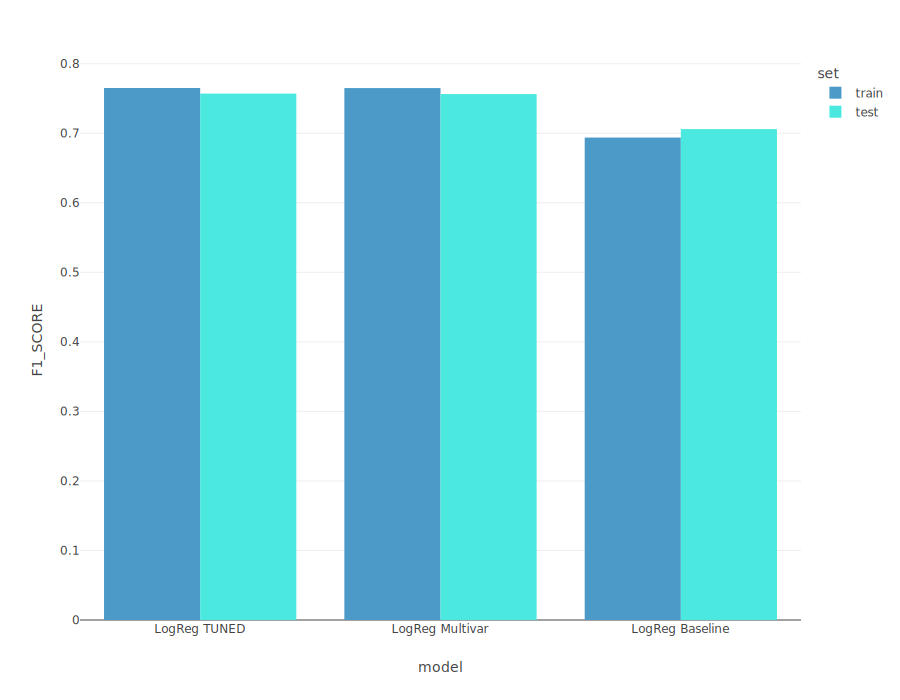

In [31]:
fig = px.bar(perf_final_df, x = "model", y = 'F1_SCORE', color = 'set', barmode = 'group', width = 900, height=700)
fig.show()

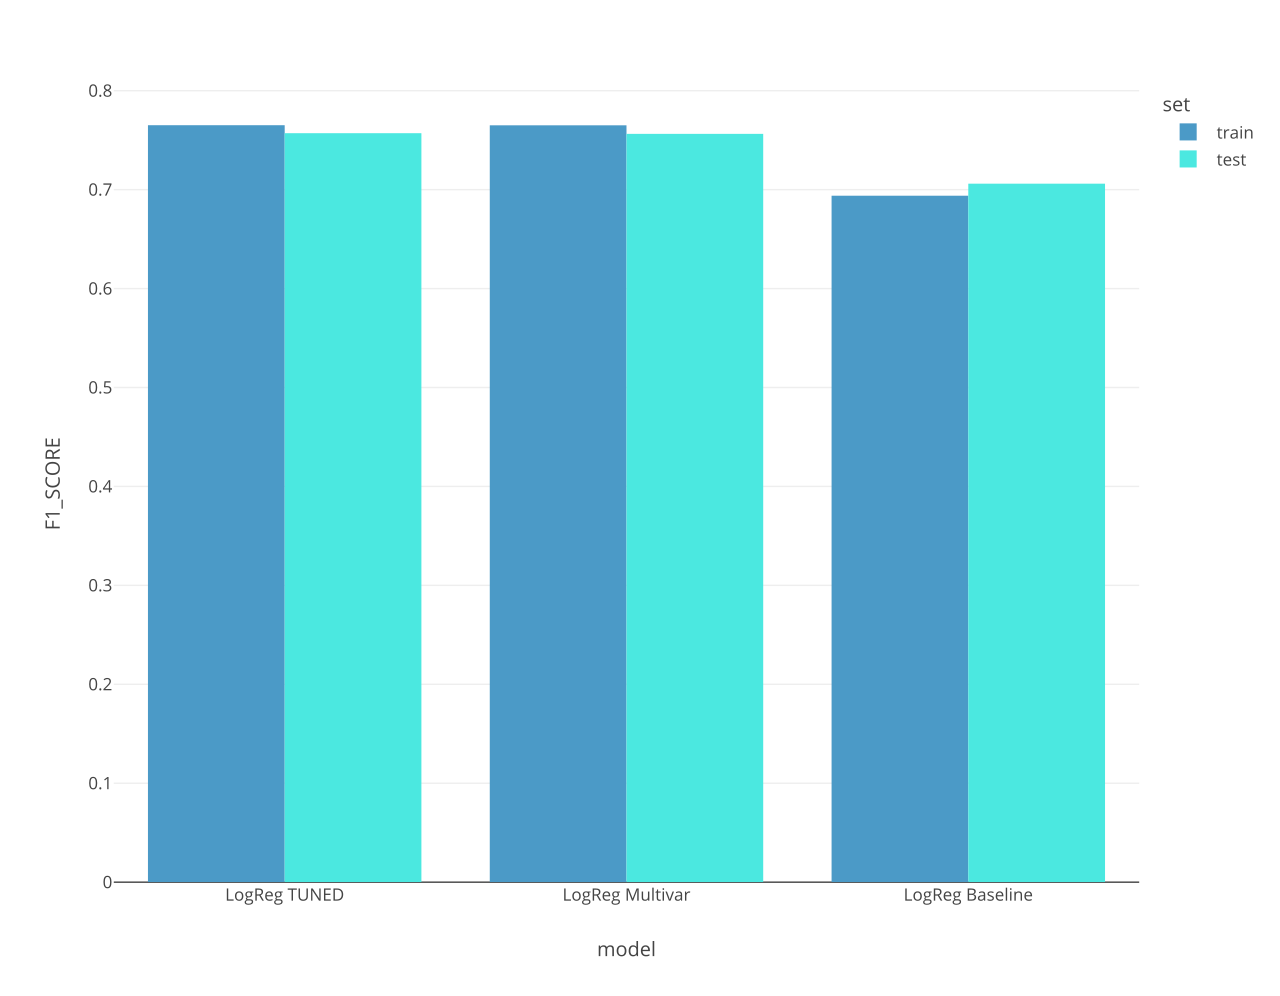

In [32]:
from IPython.display import Image
Image(filename="Graphs_ML/plotly_3_models_perf.png")



+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +

---

## 🔶 **Testing other models** (non linear & emsemble learning)

### ➡️ <ins>**MODEL 3 :** Random Forest *(non linear)* 🌲🌲🌲</ins>

In [33]:
print("Grid search...")
random_forest = RandomForestClassifier()

# Grid of values to be tested
random_forest_params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, 100]
}

print(random_forest_params)
gridsearch3 = GridSearchCV(random_forest, param_grid = random_forest_params, cv = 3, verbose = 1)
gridsearch3.fit(X_train2, Y_train2)
print('...Done')
print()

print("Best hyperparameters : ", gridsearch3.best_params_)
print("Best validation accuracy : ", gridsearch3.best_score_)
print()

GS3_Y_train_pred = gridsearch3.predict(X_train2)
GS3_Y_test_pred = gridsearch3.predict(X_test2)

print('Predictions on the train set : ', GS3_Y_train_pred)
print('Predictions on the test set : ', GS3_Y_test_pred)

print()

GS3_train_f1score = f1_score(Y_train2, GS3_Y_train_pred)
GS3_test_f1score = f1_score(Y_test2, GS3_Y_test_pred)

print('F1SCORE on the train set : ', GS3_train_f1score)
print('F1SCORE on the test set : ', GS3_test_f1score)


# Adding 'Model 3' into the dataframe 
scores.append({'name_model': 'MODEL 3',
                'model': 'Random Forest', 
                'F1_SCORE' : GS3_train_f1score,
                'set' : 'train'})

scores.append({'name_model': 'MODEL 3',
                'model': 'Random Forest', 
                'F1_SCORE' : GS3_test_f1score,
                'set' : 'test'})

df = pd.DataFrame(columns=['name_model', 'model', 'F1_SCORE', 'set'])
df_results = pd.DataFrame(scores, columns=['name_model', 'model', 'F1_SCORE', 'set'])

# Concatenate both dataframes in order to create 'perf_final_df' 
perf_final_df = pd.concat([df, df_results])
perf_final_df

Grid search...
{'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 5], 'min_samples_split': [2, 4, 8], 'n_estimators': [10, 20, 40, 60, 80, 100]}
Fitting 3 folds for each of 270 candidates, totalling 810 fits


...Done

Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 80}
Best validation accuracy :  0.9861023262351535

Predictions on the train set :  [0 0 0 ... 0 0 0]
Predictions on the test set :  [0 0 1 ... 0 0 0]

F1SCORE on the train set :  0.7664205799528122
F1SCORE on the test set :  0.7552019583843328


,name_model,model,F1_SCORE,set
0,MODEL 1,LogReg Baseline,0.693852,train
1,MODEL 1,LogReg Baseline,0.706024,test
2,MODEL 2 (multivar),LogReg Multivar,0.765021,train
3,MODEL 2 (multivar),LogReg Multivar,0.756379,test
4,MODEL 2 TUNED,LogReg TUNED,0.765118,train
5,MODEL 2 TUNED,LogReg TUNED,0.757052,test
6,MODEL 3,Random Forest,0.766421,train
7,MODEL 3,Random Forest,0.755202,test


### ➡️ <ins>**MODEL 4 :** AdaBoost Classifier with Decision Tree *(ensemble)* 🌳</ins>

In [34]:
print("Grid search...")
decision_tree = DecisionTreeClassifier()
adaboost_dt = AdaBoostClassifier(decision_tree)

# Grid of values to be tested
adaboost_dt_params = {
    'base_estimator__max_depth': [8, 10, 12],
    'base_estimator__min_samples_leaf': [1, 2, 3],
    'base_estimator__min_samples_split': [6, 8, 10],
    'n_estimators': [2, 4, 6, 8, 10, 12]
}

gridsearch4 = GridSearchCV(adaboost_dt, param_grid = adaboost_dt_params, cv = 3, verbose = 1) 
gridsearch4.fit(X_train2, Y_train2)
print("...Done.")
print()

print("Best hyperparameters : ", gridsearch4.best_params_)
print("Best validation accuracy : ", gridsearch4.best_score_)
print()


GS4_Y_train_pred = gridsearch4.predict(X_train2)
GS4_Y_test_pred = gridsearch4.predict(X_test2)

print('Predictions on the train set : ', GS4_Y_train_pred)
print('Predictions on the test set : ', GS4_Y_test_pred)

print()

GS4_train_f1score = f1_score(Y_train2, GS4_Y_train_pred)
GS4_test_f1score = f1_score(Y_test2, GS4_Y_test_pred)

print('F1SCORE on the train set : ', GS4_train_f1score)
print('F1SCORE on the test set : ', GS4_test_f1score)


# Adding 'Model 4' into the dataframe 
scores.append({'name_model': 'MODEL 4',
                'model': 'AdaBoost DecTree', 
                'F1_SCORE' : GS4_train_f1score,
                'set' : 'train'})

scores.append({'name_model': 'MODEL 4',
                'model': 'AdaBoost DecTree', 
                'F1_SCORE' : GS4_test_f1score ,
                'set' : 'test'})


df = pd.DataFrame(columns=['name_model', 'model', 'F1_SCORE', 'set'])
df_results = pd.DataFrame(scores, columns=['name_model', 'model', 'F1_SCORE', 'set'])

# Concatenate both dataframes in order to create 'perf_final_df' 
perf_final_df = pd.concat([df, df_results])
perf_final_df

Grid search...
Fitting 3 folds for each of 162 candidates, totalling 486 fits


...Done.

Best hyperparameters :  {'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 3, 'base_estimator__min_samples_split': 10, 'n_estimators': 2}
Best validation accuracy :  0.985663082437276

Predictions on the train set :  [0 0 0 ... 0 0 0]
Predictions on the test set :  [0 0 1 ... 0 0 0]

F1SCORE on the train set :  0.771180787191461
F1SCORE on the test set :  0.7531231409875074


,name_model,model,F1_SCORE,set
0,MODEL 1,LogReg Baseline,0.693852,train
1,MODEL 1,LogReg Baseline,0.706024,test
2,MODEL 2 (multivar),LogReg Multivar,0.765021,train
3,MODEL 2 (multivar),LogReg Multivar,0.756379,test
4,MODEL 2 TUNED,LogReg TUNED,0.765118,train
5,MODEL 2 TUNED,LogReg TUNED,0.757052,test
6,MODEL 3,Random Forest,0.766421,train
7,MODEL 3,Random Forest,0.755202,test
8,MODEL 4,AdaBoost DecTree,0.771181,train
9,MODEL 4,AdaBoost DecTree,0.753123,test


### ➡️ <ins>**MODEL 5 :** AdaBoost Classifier with Logistic Regression *(ensemble)* 🌻</ins>

In [35]:
print("Grid search...")
print()
logistic_regression = LogisticRegression(max_iter = 1000)
adaboost_logreg = AdaBoostClassifier(logistic_regression)

# Grid of values to be tested
adaboost_logreg_params = {
    'base_estimator__C': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0],
    'n_estimators': [5, 10, 20, 40, 60, 80, 100]
}

gridsearch5 = GridSearchCV(adaboost_logreg, param_grid = adaboost_logreg_params, cv = 3, verbose = 1) # cv : the number of folds to be used for CV
gridsearch5.fit(X_train2, Y_train2)
print("...Done.")

print()
print("Best hyperparameters : ", gridsearch5.best_params_)
print("Best validation accuracy : ", gridsearch5.best_score_)
print()


GS5_Y_train_pred = gridsearch5.predict(X_train2)
GS5_Y_test_pred = gridsearch5.predict(X_test2)

print('Predictions on the train set : ', GS5_Y_train_pred)
print('Predictions on the test set : ', GS5_Y_test_pred)

print()

GS5_train_f1score = f1_score(Y_train2, GS5_Y_train_pred)
GS5_test_f1score = f1_score(Y_test2, GS5_Y_test_pred)

print('F1SCORE on the train set : ', GS5_train_f1score)
print('F1SCORE on the test set : ', GS5_test_f1score)



# Adding 'Model 4' into the dataframe 
scores.append({'name_model': 'MODEL 5',
                'model': 'AdaBoost LogReg', 
                'F1_SCORE' : GS5_train_f1score,
                'set' : 'train'})

scores.append({'name_model': 'MODEL 5',
                'model': 'AdaBoost LogReg', 
                'F1_SCORE' : GS5_test_f1score,
                'set' : 'test'})


df = pd.DataFrame(columns=['name_model', 'model', 'F1_SCORE', 'set'])
df_results = pd.DataFrame(scores, columns=['name_model', 'model', 'F1_SCORE', 'set'])

# Concatenate both dataframes in order to create 'perf_final_df' 
perf_final_df = pd.concat([df, df_results])
perf_final_df

Grid search...

Fitting 3 folds for each of 56 candidates, totalling 168 fits


...Done.

Best hyperparameters :  {'base_estimator__C': 5.0, 'n_estimators': 80}
Best validation accuracy :  0.986273631316326

Predictions on the train set :  [0 0 0 ... 0 0 0]
Predictions on the test set :  [0 0 1 ... 0 0 0]

F1SCORE on the train set :  0.764031382015691
F1SCORE on the test set :  0.7575941676792223


,name_model,model,F1_SCORE,set
0,MODEL 1,LogReg Baseline,0.693852,train
1,MODEL 1,LogReg Baseline,0.706024,test
2,MODEL 2 (multivar),LogReg Multivar,0.765021,train
3,MODEL 2 (multivar),LogReg Multivar,0.756379,test
4,MODEL 2 TUNED,LogReg TUNED,0.765118,train
5,MODEL 2 TUNED,LogReg TUNED,0.757052,test
6,MODEL 3,Random Forest,0.766421,train
7,MODEL 3,Random Forest,0.755202,test
8,MODEL 4,AdaBoost DecTree,0.771181,train
9,MODEL 4,AdaBoost DecTree,0.753123,test


### ➡️ <ins>**MODEL 6 :** Gradient Bosting Classifier *(ensemble)* 	🌼</ins>

In [36]:
print("Grid search...")
print()

gradientboost = GradientBoostingClassifier()

# Grid of values to be tested
gradientboost_params = {
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [6, 8, 10],
    'n_estimators': [2, 4, 6, 8, 10, 12]
}

gridsearch6 = GridSearchCV(gradientboost, param_grid = gradientboost_params, cv = 3, verbose = 1)
gridsearch6.fit(X_train2, Y_train2)
print("...Done.")
print()

print("Best hyperparameters : ", gridsearch6.best_params_)
print("Best validation accuracy : ", gridsearch6.best_score_)
print()


GS6_Y_train_pred = gridsearch6.predict(X_train2)
GS6_Y_test_pred = gridsearch6.predict(X_test2)

print('Predictions on the train set : ', GS6_Y_train_pred)
print('Predictions on the test set : ', GS6_Y_test_pred)
print()

GS6_train_f1score = f1_score(Y_train2, GS6_Y_train_pred)
GS6_test_f1score = f1_score(Y_test2, GS6_Y_test_pred)

print('F1SCORE on the train set : ', GS6_train_f1score)
print('F1SCORE on the test set : ', GS6_test_f1score)
print()


# Adding 'Model 4' into the dataframe 
scores.append({'name_model': 'MODEL 6',
                'model': 'Gradient Boosting', 
                'F1_SCORE' : GS6_train_f1score,
                'set' : 'train'})

scores.append({'name_model': 'MODEL 6',
                'model': 'Gradient Boosting', 
                'F1_SCORE' : GS6_test_f1score,
                'set' : 'test'})


df = pd.DataFrame(columns=['name_model', 'model', 'F1_SCORE', 'set'])
df_results = pd.DataFrame(scores, columns=['name_model', 'model', 'F1_SCORE', 'set'])

# Concatenate both dataframes in order to create 'perf_final_df' 
perf_final_df = pd.concat([df, df_results])
perf_final_df

Grid search...

Fitting 3 folds for each of 162 candidates, totalling 486 fits


...Done.

Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 12}
Best validation accuracy :  0.9853556117787616

Predictions on the train set :  [0 0 0 ... 0 0 0]
Predictions on the test set :  [0 0 0 ... 0 0 0]

F1SCORE on the train set :  0.7517945445844634
F1SCORE on the test set :  0.7294344473007711



,name_model,model,F1_SCORE,set
0,MODEL 1,LogReg Baseline,0.693852,train
1,MODEL 1,LogReg Baseline,0.706024,test
2,MODEL 2 (multivar),LogReg Multivar,0.765021,train
3,MODEL 2 (multivar),LogReg Multivar,0.756379,test
4,MODEL 2 TUNED,LogReg TUNED,0.765118,train
5,MODEL 2 TUNED,LogReg TUNED,0.757052,test
6,MODEL 3,Random Forest,0.766421,train
7,MODEL 3,Random Forest,0.755202,test
8,MODEL 4,AdaBoost DecTree,0.771181,train
9,MODEL 4,AdaBoost DecTree,0.753123,test


### ➡️ <ins>**MODEL 7 :** XGBoost Classifier *(ensemble)* 🌸</ins>

In [37]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier()

# Grid of values to be tested
xgboost_params = {
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 2, 4, 6, 8],
    'n_estimators': [2, 4, 6, 8, 10, 12]
}

print(xgboost_params)
gridsearch7 = GridSearchCV(xgboost, param_grid = xgboost_params, cv = 3, verbose = 1) 
gridsearch7.fit(X_train2, Y_train2)
print("...Done.")

print("Best hyperparameters : ", gridsearch7.best_params_)
print("Best validation accuracy : ", gridsearch7.best_score_)
print()


GS7_Y_train_pred = gridsearch7.predict(X_train2)
GS7_Y_test_pred = gridsearch7.predict(X_test2)

print('Predictions on the train set : ', GS7_Y_train_pred)
print('Predictions on the test set : ', GS7_Y_test_pred)
print()

GS7_train_f1score = f1_score(Y_train2, GS7_Y_train_pred)
GS7_test_f1score = f1_score(Y_test2, GS7_Y_test_pred)

print('F1SCORE on the train set : ', GS7_train_f1score)
print('F1SCORE on the test set : ', GS7_test_f1score)



# Adding 'Model 4' into the dataframe 
scores.append({'name_model': 'MODEL 7',
                'model': 'XG Boost', 
                'F1_SCORE' : GS7_train_f1score,
                'set' : 'train'})

scores.append({'name_model': 'MODEL 7',
                'model': 'XG Boost', 
                'F1_SCORE' : GS7_test_f1score,
                'set' : 'test'})
                
                
df = pd.DataFrame(columns=['name_model', 'model', 'F1_SCORE', 'set'])
df_results = pd.DataFrame(scores, columns=['name_model', 'model', 'F1_SCORE', 'set'])

# Concatenate both dataframes in order to create 'perf_final_df' 
perf_final_df = pd.concat([df, df_results])
perf_final_df

Grid search...
{'max_depth': [4, 6, 8, 10], 'min_child_weight': [1, 2, 4, 6, 8], 'n_estimators': [2, 4, 6, 8, 10, 12]}
Fitting 3 folds for each of 120 candidates, totalling 360 fits


...Done.
Best hyperparameters :  {'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 12}
Best validation accuracy :  0.9860715791693021

Predictions on the train set :  [0 0 0 ... 0 0 0]
Predictions on the test set :  [0 0 1 ... 0 0 0]

F1SCORE on the train set :  0.7641872032557089
F1SCORE on the test set :  0.7542475728155339


,name_model,model,F1_SCORE,set
0,MODEL 1,LogReg Baseline,0.693852,train
1,MODEL 1,LogReg Baseline,0.706024,test
2,MODEL 2 (multivar),LogReg Multivar,0.765021,train
3,MODEL 2 (multivar),LogReg Multivar,0.756379,test
4,MODEL 2 TUNED,LogReg TUNED,0.765118,train
5,MODEL 2 TUNED,LogReg TUNED,0.757052,test
6,MODEL 3,Random Forest,0.766421,train
7,MODEL 3,Random Forest,0.755202,test
8,MODEL 4,AdaBoost DecTree,0.771181,train
9,MODEL 4,AdaBoost DecTree,0.753123,test


### ➡️ <ins>**MODEL 8 :** Support Vector Machine Classifier *(non linear)* 🍄</ins>

In [38]:
print("Grid search...")
print()
svc = SVC(probability=True)


svc_params = {
    'kernel': ['rbf', 'poly', 'linear'],
    'C': [1, 5, 10, 50],
    'gamma': [0.0001, 0.0005, 0.001, 0.005],
    }


gridsearch8 = GridSearchCV(xgboost, param_grid = svc_params, cv = 3, verbose = 1) 
gridsearch8.fit(X_train2, Y_train2)
print("...Done.")
print()

print("Best hyperparameters : ", gridsearch8.best_params_)
print("Best validation accuracy : ", gridsearch8.best_score_)
print()


GS8_Y_train_pred = gridsearch8.predict(X_train2)
GS8_Y_test_pred = gridsearch8.predict(X_test2)

print('Predictions on the train set : ', GS8_Y_train_pred)
print('Predictions on the test set : ', GS8_Y_test_pred)
print()

GS8_train_f1score = f1_score(Y_train2, GS8_Y_train_pred)
GS8_test_f1score = f1_score(Y_test2, GS8_Y_test_pred)

print('F1SCORE on the train set : ', GS8_train_f1score)
print('F1SCORE on the test set : ', GS8_test_f1score)



# Adding 'Model 4' into the dataframe 
scores.append({'name_model': 'MODEL 8',
                'model': 'Support Vector Classifier', 
                'F1_SCORE' : GS8_train_f1score,
                'set' : 'train'})

scores.append({'name_model': 'MODEL 8',
                'model': 'Support Vector Classifier', 
                'F1_SCORE' : GS8_test_f1score,
                'set' : 'test'})
                
                
df = pd.DataFrame(columns=['name_model', 'model', 'F1_SCORE', 'set'])
df_results = pd.DataFrame(scores, columns=['name_model', 'model', 'F1_SCORE', 'set'])

# Concatenate both dataframes in order to create 'perf_final_df' 
perf_final_df = pd.concat([df, df_results])
perf_final_df

Grid search...

Fitting 3 folds for each of 48 candidates, totalling 144 fits


...Done.

Best hyperparameters :  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best validation accuracy :  0.9858519572703633

Predictions on the train set :  [0 0 0 ... 0 0 0]
Predictions on the test set :  [0 0 1 ... 0 0 0]

F1SCORE on the train set :  0.7736668663870582
F1SCORE on the test set :  0.7563832982877741


,name_model,model,F1_SCORE,set
0,MODEL 1,LogReg Baseline,0.693852,train
1,MODEL 1,LogReg Baseline,0.706024,test
2,MODEL 2 (multivar),LogReg Multivar,0.765021,train
3,MODEL 2 (multivar),LogReg Multivar,0.756379,test
4,MODEL 2 TUNED,LogReg TUNED,0.765118,train
5,MODEL 2 TUNED,LogReg TUNED,0.757052,test
6,MODEL 3,Random Forest,0.766421,train
7,MODEL 3,Random Forest,0.755202,test
8,MODEL 4,AdaBoost DecTree,0.771181,train
9,MODEL 4,AdaBoost DecTree,0.753123,test


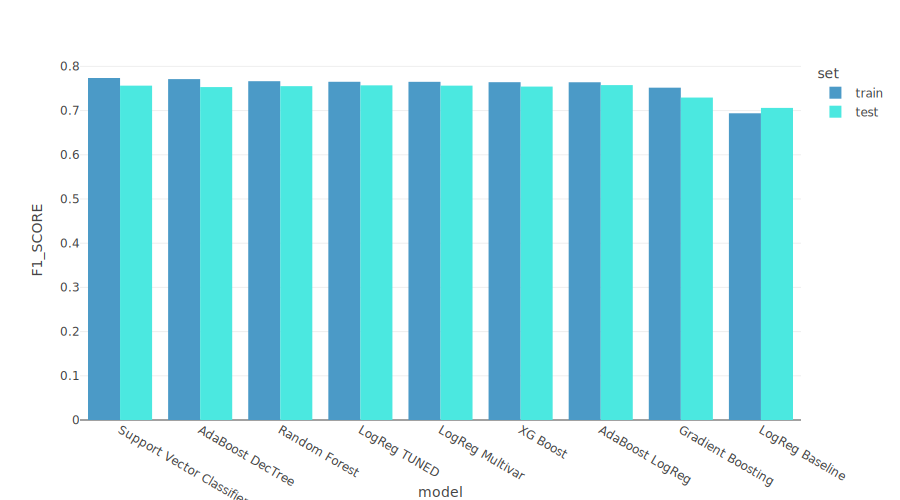

In [39]:
perf_final_df = perf_final_df.sort_values(by = ['set', 'F1_SCORE'], ascending = False)
px.bar(perf_final_df, x = "model", y = 'F1_SCORE', color = 'set', barmode = 'group', width = 900)

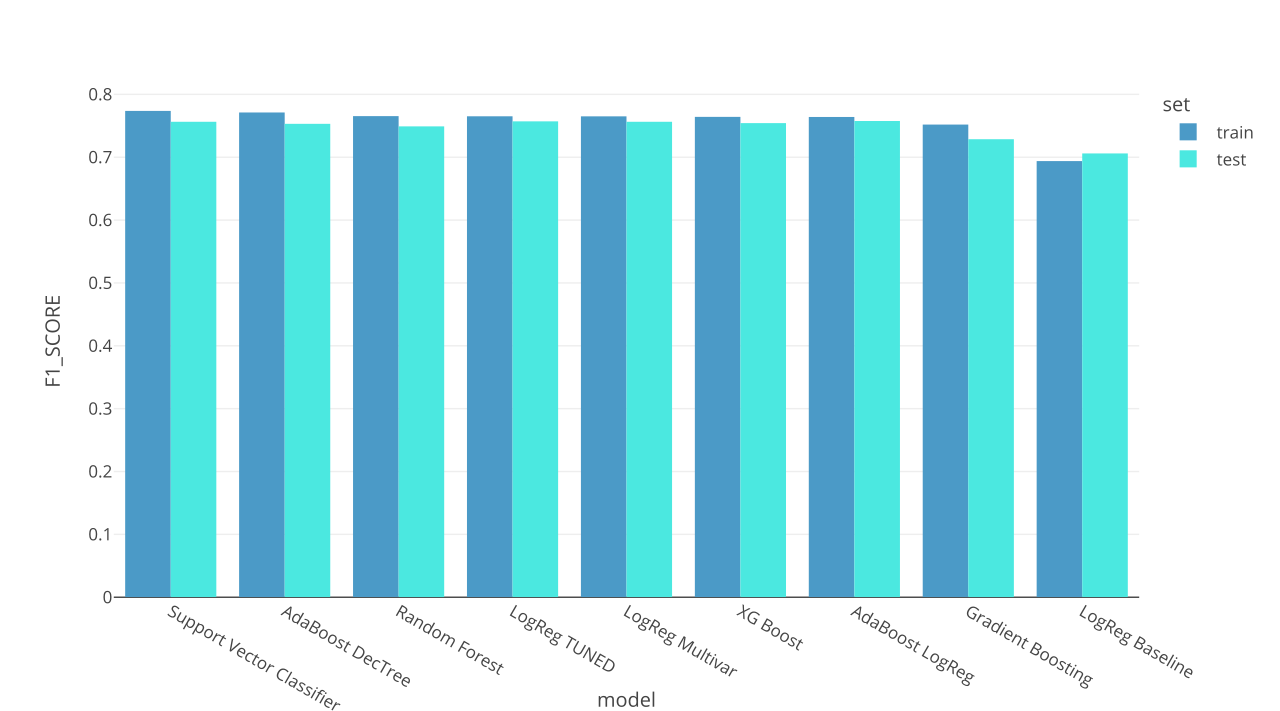

In [40]:
from IPython.display import Image
Image(filename="Graphs_ML/plotly_all_models_perf.png")

3 best models are : SVC, Adaboost Decision Tree and the Logistic Regression Tuned (model 2)
They don't differ that much in term of performances, let's try to do voting 

## 🔷 **Voting** ✋

##### - Here we are going to execute a Soft Voting algorithm (more accurate thant Hard Voting) with 3 best classifiers (using the probability of predictions)

In [41]:
voting = VotingClassifier(estimators=[
                                      ("LogReg TUNED", grid_search2),
                                      ("AdaBoost DecTree", gridsearch4),
                                      ("Support Vector Classifier", gridsearch8)], 
                                      voting='soft') 

voting.fit(X_train2, Y_train2)

voting_Y_train2_pred = voting.predict(X_train2)
voting_Y_test2_pred = voting.predict(X_test2)

print("Predictions on training set : ", voting_Y_train2_pred)
print("Predictions on test set : ", voting_Y_test2_pred)
print()


print("F1 SCORE on training set : ", f1_score(Y_train2, voting_Y_train2_pred))
print("F1 SCORE on test set : ", f1_score(Y_test2, voting_Y_test2_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Predictions on training set :  [0 0 0 ... 0 0 0]
Predictions on test set :  [0 0 1 ... 0 0 0]

F1 SCORE on training set :  0.7718537351379645
F1 SCORE on test set :  0.7581227436823105


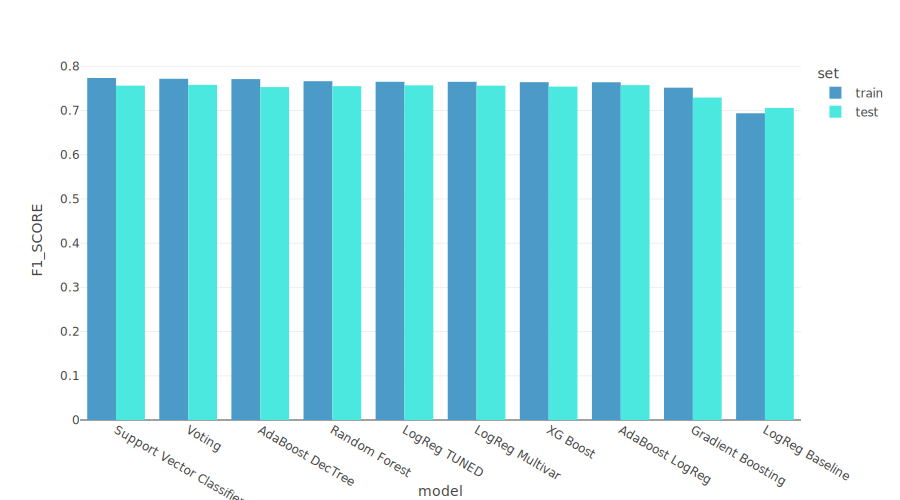

In [42]:
scores.append({'name_model': 'VOTING',
                'model': 'Voting', 
                'F1_SCORE' : f1_score(Y_train2, voting_Y_train2_pred),
                'set' : 'train'})

scores.append({'name_model': 'VOTING',
                'model': 'Voting', 
                'F1_SCORE' : f1_score(Y_test2, voting_Y_test2_pred),
                'set' : 'test'})

df = pd.DataFrame(columns=['name_model', 'model', 'F1_SCORE', 'set'])
df_results = pd.DataFrame(scores, columns=['name_model', 'model', 'F1_SCORE', 'set'])

perf_final_df = pd.concat([df, df_results])

perf_final_df = perf_final_df.sort_values(by = ['set', 'F1_SCORE'], ascending = False)
px.bar(perf_final_df, x = "model", y = 'F1_SCORE', color = 'set', barmode = 'group', width = 900)

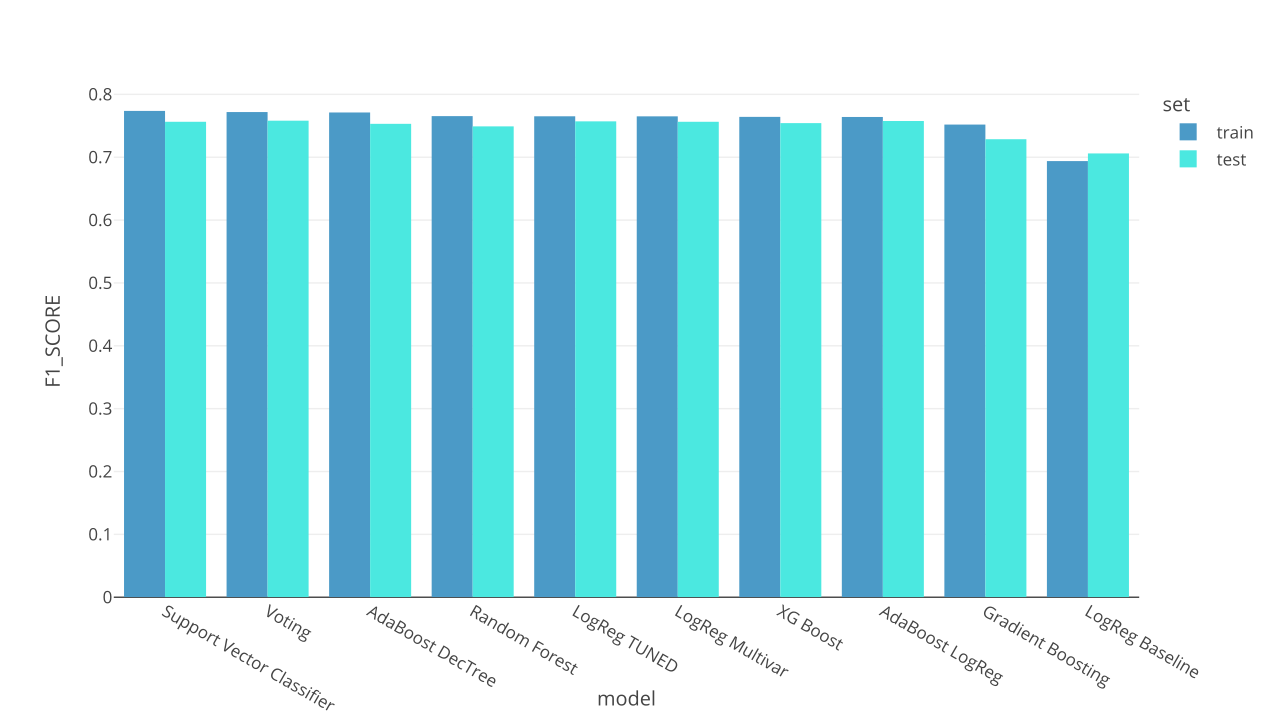

In [43]:
from IPython.display import Image
Image(filename="Graphs_ML/plotly_all_with_voting_perf.png")

In [44]:
perf_final_df = perf_final_df.sort_values(by = ['set', 'F1_SCORE'], ascending = False)
perf_final_df

,name_model,model,F1_SCORE,set
16,MODEL 8,Support Vector Classifier,0.773667,train
18,VOTING,Voting,0.771854,train
8,MODEL 4,AdaBoost DecTree,0.771181,train
6,MODEL 3,Random Forest,0.766421,train
4,MODEL 2 TUNED,LogReg TUNED,0.765118,train
2,MODEL 2 (multivar),LogReg Multivar,0.765021,train
14,MODEL 7,XG Boost,0.764187,train
10,MODEL 5,AdaBoost LogReg,0.764031,train
12,MODEL 6,Gradient Boosting,0.751795,train
0,MODEL 1,LogReg Baseline,0.693852,train


#### **CONCLUSION** : 

- 3 best models global perfomances are : SVC, Voting and Adaboost DecTree
- The most important is to focus on the TEST SCORE which is ability of the test to make predictions on unknown datas 
- As we can see on 'perf_final_df : best performances on test and best balance in terme of variace-bias trade-off are made by the **Voting Model**

-----

## 🔷 **PART 3️⃣ :** **Training on all data** of Conversion Train Dataset

------

#### ➡️ **Training on ALL DATA** from Conversion Train dataset

In [45]:
# defining Voting model as Best model 

best_model = voting

In [46]:
# Here we concatenate our train and test set to train your best classifier on all data with labels
all_data_X = np.append(X_train2, X_test2, axis=0)
all_data_Y = np.append(Y_train2, Y_test2)

# Fitting model 
best_model.fit(all_data_X, all_data_Y)

# Predictions 
all_data_Y_pred = best_model.predict(all_data_X)

# Performances 
print('F1 SCORE with BEST MODEL -- On all training data : ', f1_score(all_data_Y, all_data_Y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
F1 SCORE with BEST MODEL -- On all training data :  0.7716573067272076


**INTERPRETATIONS :** 
* Traning the best model (Voting) on all data do not significantly raise performances 

---

## ➡️ **Preprocessing on the TEST DATA** (without labels)

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +

In [47]:
conversion_without_labels = pd.read_csv('/Volumes/T7/__Project 4 ML__/CONVERSION /conversion_data_test.csv')
print('Shape of Prediction Set (without labels) :', conversion_without_labels.shape)
print()
print('Here is the dataset without the target :')
conversion_without_labels.head()

Shape of Prediction Set (without labels) : (31620, 5)

Here is the dataset without the target :


,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3


In [48]:
features_list_without_labels = ['total_pages_visited', 'age', 'new_user', 'country', 'source']
numerical_features2 = [0, 1]
categorical_features2 = [2, 3, 4]
X_without_labels = conversion_without_labels.loc[:, features_list_without_labels]

print("Converting pandas DataFrames to numpy arrays...")
print()
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Converting pandas DataFrames to numpy arrays...

...Done
[[16 28 0 'UK' 'Seo']
 [5 22 1 'UK' 'Direct']
 [1 32 1 'China' 'Seo']
 [6 32 1 'US' 'Ads']
 [3 25 0 'China' 'Seo']]


In [49]:
print("Encoding categorical features and standardizing numerical features...")
print()

numerical_features2_without_lab = [0, 1]
numerical_transformer2_without_lab = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features2_without_lab = [2, 3, 4]
categorical_transformer2_without_lab = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor2_without_lab = ColumnTransformer(transformers=[
    ('num', numerical_transformer2_without_lab, numerical_features2_without_lab),
    ('cat', categorical_transformer2_without_lab, categorical_features2_without_lab)])

X_without_labels = preprocessor2_without_lab.fit_transform(X_without_labels)

print()
print("...Done")
print()

print(X_without_labels[0:5,:])
 

Encoding categorical features and standardizing numerical features...


...Done

[[ 3.33913917 -0.31512217  0.          0.          1.          0.
   0.          1.        ]
 [ 0.03888347 -1.03657046  1.          0.          1.          0.
   1.          0.        ]
 [-1.16120951  0.16584336  1.          0.          0.          0.
   0.          1.        ]
 [ 0.33890671  0.16584336  1.          0.          0.          1.
   0.          0.        ]
 [-0.56116302 -0.67584631  0.          0.          0.          0.
   0.          1.        ]]


----------------------------------------------------------------------------
                   C O N F U S I O N   M A T R I X 
----------------------------------------------------------------------------




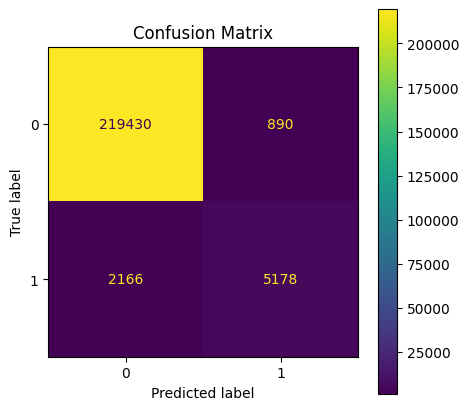



----------------------------------------------------------------------------
----------------------------------------------------------------------------


In [50]:
# Confusion Matrix 

print('----------------------------------------------------------------------------')
print('                   C O N F U S I O N   M A T R I X ')
print('----------------------------------------------------------------------------')
print()
print()
_, ax = plt.subplots(figsize=(5,5))
ax.set(title="Confusion Matrix")
ConfusionMatrixDisplay.from_estimator(best_model, X_train2, Y_train2, ax=ax)
plt.show()

print()
print()
print('----------------------------------------------------------------------------')
print('----------------------------------------------------------------------------')

----------------------------------------------------------------------------
                            R O C   C U R V E  
----------------------------------------------------------------------------




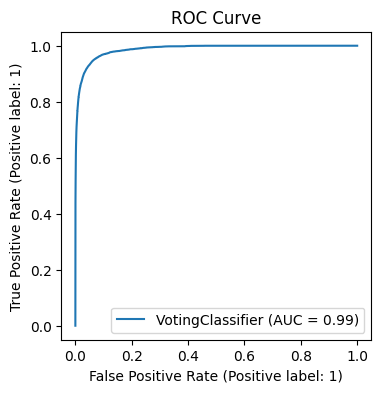



----------------------------------------------------------------------------
----------------------------------------------------------------------------


In [51]:
# ROC Curve 

print('----------------------------------------------------------------------------')
print('                            R O C   C U R V E  ')
print('----------------------------------------------------------------------------')
print()
print()

_, ax = plt.subplots(figsize=(4,4))
ax.set(title="ROC Curve")
RocCurveDisplay.from_estimator(best_model, X_train2, Y_train2, ax=ax)
plt.show()

print()
print()
print('----------------------------------------------------------------------------')
print('----------------------------------------------------------------------------')

In [52]:
# Our predictions saved in 'conversion_data_test_predictions_DORIANEDOYONDOUSSE.csv'

data = {
    'converted': best_model.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'], data=data)
Y_predictions.to_csv('conversion_data_test_predictions_DORIANEDOYONDOUSSE.csv', index=False)

-----

## 🔷 **PART 4️⃣ :** **Recommendations** about Newsletter's Conversion Rate

------

##### <ins>**What we could say to Data Science Weekly team about Conversion Rate to their Newsletter :**</ins>
* Young people tend to convert more than older people (age correlation)
* More the user look at pages more he tend to convert 
* Americans are the country how visit more their website but it doesn't mean they convert more : Germans do, they are the country where conversion rate is higher 
* Ads brings them a lot of potential users but Seo is the best source permiting them to gain cconversion rate


##### <ins>**What we would recommand :**</ins>
 
* Push researchs to understand why olders look less pages, try maybe change title of articles or website design to make it more attrative so than the esthetic make them want to look more and more pages 
* Understand topics that are attractive for older people and for youngers
* Target more Europe, they seem to convert well 


##### <ins>**How to impove the predictions performances:**</ins>

+ Do feature engineering with explanatory variables 
+ Use non supervised technics suchs as PCA to reduce number of explanatory variables in order to "prepare" data and variables before lunching supervised ML algorithms
+ It was out of the scope of Jedha's program but with researches I founded that using SMOTE or other technics to BALANCE THE TARGET could have raise the f1 score